In [5]:
%pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2

   ---------------------------------------- 172.3/172.3 MB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 1.2/1.2 MB 154.2 kB/s eta 0:00:00
   ---------------------------------------- 2.1/2.1 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install timm==0.4.12

   -------------------------------------- 377.0/377.0 kB 263.8 kB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.9
    Uninstalling timm-1.0.9:
      Successfully uninstalled timm-1.0.9
Note: you may need to restart the kernel to use updated packages.


In [19]:
import arcgis
import arcpy
from arcgis.gis import GIS
from arcgis.learn import detect_objects
from arcgis.raster.functions import equal_to


import pandas as pd
from datetime import datetime as dt
from PIL import Image
import numpy as np

In [20]:
gis = GIS("home")

<Item title:"Car Detection - USA" type:Deep Learning Package owner:esri_analytics>
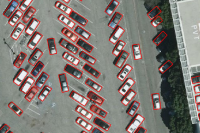

In [21]:
model = gis.content.search("Car Detection-USA owner:esri_analytics", "Deep Learning Package", outside_org=True)[0]
model

In [25]:
items = gis.content.search("Melbourne931")

for item in items:
    print(f"Title: {item.title}")
    print(f"Item ID: {item.id}")

Title: Melbourne931_TIF
Item ID: eb380ac140534d83bd93bd8d33f9c670
Title: Melbourne931_TIF
Item ID: fe12e0d6b0564d3fa685c607b67906c8


In [30]:
site_1 = gis.content.get('eb380ac140534d83bd93bd8d33f9c670')
site_1.layers[0]

<MapRasterLayer url:"https://tiles.arcgis.com/tiles/ligOmcZkuYGDjlNm/arcgis/rest/services/Melbourne931_TIF/MapServer/0">

<Item title:"Melbourne931_TIF" type:Map Image Layer owner:david.bruner>
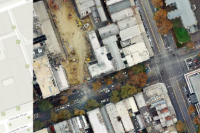

In [31]:
detected_cars = detect_objects(
    input_raster = site_1.layers[0],
    model = model,
    output_name = "detected_cars" + str(dt.now().microsecond),
    model_arguments = {
        "padding": "100",
        "batch_size": "16",
        "threshold": "0.9",
        "return_bboxes": "False",
        "tile_size": "224",
    },
    context = {
        "processorType": "GPU"
    }
)

# Process results
num_cars = len(detected_cars.query(as_df=True))
print(f"Number of cars detected: {num_cars}")

Exception: {'error': 'job failed to get submitted', 'error_description': 'Failed to compute cost/credits for tool DetectObjectsUsingDeepLearning'}